<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: The State of California: ACT & SAT Performance Analysis

## Data Visualizations and Statistical Analysis


## Coding Challenges

In [547]:
# Takes in values and returns the mean of the values

def mean_of_values(values):
    return sum(values) / len(values)

In [548]:
# Takes in values and returns the standard deviation of the values

def std_of_values(values):
    variance = sum([(value - mean_of_values(values))**2 for value in values]) / len(values)
    return variance ** 0.5

In [549]:
# Takes in a string that is a number and a percent symbol and converts 
# this to a float that is the decimal approximation of the percent.

def perc_string_to_float(perc_string):
    return float(perc_string.strip('%'))/100

## Data Import and Cleaning

In [550]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### ACT

In [551]:
act = pd.read_csv('../data/act_2019_ca.csv')

In [552]:
act.head()

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTstTakr,AvgScrRead,AvgScrEng,AvgScrMath,AvgScrSci,NumGE21,PctGE21,Year,Unnamed: 17
0,3.366993e+13,33.0,3366993.0,129882.0,S,21st Century Learning Institute,Beaumont Unified,Riverside,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
1,1.964212e+13,19.0,1964212.0,1995596.0,S,ABC Secondary (Alternative),ABC Unified,Los Angeles,58.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
2,1.563776e+13,15.0,1563776.0,1530377.0,S,Abraham Lincoln Alternative,Southern Kern Unified,Kern,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
3,4.369666e+13,43.0,4369666.0,4333795.0,S,Abraham Lincoln High,San Jose Unified,Santa Clara,463.0,53.0,23,22,22,23,34,64.15,2018-19,NaN
4,1.964733e+13,19.0,1964733.0,1935121.0,S,Abraham Lincoln Senior High,Los Angeles Unified,Los Angeles,226.0,19.0,21,20,23,22,11,57.89,2018-19,NaN


In [553]:
act.tail()

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTstTakr,AvgScrRead,AvgScrEng,AvgScrMath,AvgScrSci,NumGE21,PctGE21,Year,Unnamed: 17
2305,5.810588e+13,58.0,5810587.0,5830112.0,S,Yuba County Career Preparatory Charter,Yuba County Office of Education,Yuba,102.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
2306,3.667959e+13,36.0,3667959.0,3638509.0,S,Yucaipa High,Yucaipa-Calimesa Joint Unified,San Bernardino,628.0,61.0,24,22,22,22,40,65.57,2018-19,NaN
2307,3.667777e+13,36.0,3667777.0,3638616.0,S,Yucca Valley High,Morongo Unified,San Bernardino,314.0,11.0,*,*,*,*,*,*,2018-19,NaN
2308,3.667850e+13,36.0,3667850.0,3630530.0,S,Zupanic High,Rialto Unified,San Bernardino,47.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
2309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [554]:
act.shape

(2310, 18)

In [555]:
act.dtypes

CDS            float64
CCode          float64
CDCode         float64
SCode          float64
RType           object
SName           object
DName           object
CName           object
Enroll12       float64
NumTstTakr     float64
AvgScrRead      object
AvgScrEng       object
AvgScrMath      object
AvgScrSci       object
NumGE21         object
PctGE21         object
Year            object
Unnamed: 17    float64
dtype: object

In [556]:
# Checking for missing values, obvious issues, incorrect data types & dropping uneccessary rows/columns

act.isnull().sum()

CDS               1
CCode             1
CDCode            1
SCode           523
RType             1
SName           581
DName            59
CName             1
Enroll12          1
NumTstTakr        1
AvgScrRead      357
AvgScrEng       357
AvgScrMath      357
AvgScrSci       357
NumGE21         357
PctGE21         357
Year              1
Unnamed: 17    2310
dtype: int64

In [557]:
act.drop(columns=['Unnamed: 17'], inplace=True)
act.drop([2309], inplace = True)

In [558]:
act['SCode'].replace(np.NaN, 'N/A', inplace=True)
act['SName'].replace(np.NaN, 'N/A', inplace=True)
act['NumGE21'].replace('*', np.NaN, inplace = True)
act['PctGE21'].replace('*', np.NaN, inplace = True)

In [559]:
act.dropna(inplace=True)

In [560]:
act.reset_index(drop=True, inplace=True)

In [561]:
act.isnull().sum()

CDS           0
CCode         0
CDCode        0
SCode         0
RType         0
SName         0
DName         0
CName         0
Enroll12      0
NumTstTakr    0
AvgScrRead    0
AvgScrEng     0
AvgScrMath    0
AvgScrSci     0
NumGE21       0
PctGE21       0
Year          0
dtype: int64

In [562]:
act['AvgScrRead'] = act['AvgScrRead'].astype(float)
act['AvgScrEng'] = act['AvgScrEng'].astype(float)
act['AvgScrMath'] = act['AvgScrMath'].astype(float)
act['AvgScrSci'] = act['AvgScrSci'].astype(float)
act['NumGE21'] = act['NumGE21'].astype(float)
act['PctGE21'] = act['PctGE21'].astype(float)

act.dtypes

CDS           float64
CCode         float64
CDCode        float64
SCode          object
RType          object
SName          object
DName          object
CName          object
Enroll12      float64
NumTstTakr    float64
AvgScrRead    float64
AvgScrEng     float64
AvgScrMath    float64
AvgScrSci     float64
NumGE21       float64
PctGE21       float64
Year           object
dtype: object

In [563]:
new_act_columns_dict = {
    'CDS': 'county_district_school_code',
    'CCode': 'county_code',
    'CDCode': 'district_code',
    'SCode': 'school_code',
    'RType': 'record_type',
    'DName': 'district_name',
    'CName': 'county_name',
    'SName':'school_name',
    'Enroll12': 'grade_12_enrollment',
    'NumTstTakr': 'total_num_test_takers',
    'AvgScrRead': 'avg_reading',
    'AvgScrEng': 'avg_english',
    'AvgScrMath': 'avg_math',
    'AvgScrSci': 'avg_science',
    'NumGE21': 'num_test_takers_21',
    'PctGE21': 'pct_test_takers_21',
    'Year': 'year',
}

act = act.rename(columns=new_act_columns_dict)

In [564]:
# Checking that average score values are within possible range

act['avg_reading'].value_counts().sort_index()

12.0      1
13.0      2
14.0      7
15.0     27
16.0     57
17.0     65
18.0    114
19.0    115
20.0    110
21.0    121
22.0    113
23.0    129
24.0    111
25.0    122
26.0    101
27.0     70
28.0     54
29.0     32
30.0     10
31.0      5
32.0      1
Name: avg_reading, dtype: int64

In [565]:
act['avg_english'].value_counts().sort_index()

10.0      1
11.0      2
12.0      1
13.0     14
14.0     37
15.0     52
16.0     75
17.0     93
18.0    132
19.0     95
20.0    110
21.0    126
22.0    126
23.0     94
24.0     93
25.0     88
26.0     78
27.0     52
28.0     43
29.0     33
30.0     11
31.0      5
32.0      6
Name: avg_english, dtype: int64

In [566]:
act['avg_math'].value_counts().sort_index()

14.0      2
15.0     15
16.0     58
17.0    110
18.0    135
19.0    144
20.0    128
21.0    126
22.0    150
23.0    121
24.0     99
25.0    107
26.0     61
27.0     50
28.0     30
29.0     16
30.0     10
31.0      2
32.0      3
Name: avg_math, dtype: int64

In [567]:
act['avg_science'].value_counts().sort_index()

12.0      1
13.0      1
14.0      3
15.0     30
16.0     45
17.0     84
18.0    123
19.0    158
20.0    135
21.0    119
22.0    171
23.0    139
24.0    113
25.0     95
26.0     66
27.0     45
28.0     20
29.0     14
30.0      3
31.0      2
Name: avg_science, dtype: int64

In [568]:
# Adding a participation percentage column

act.insert(10, 'perc_participation',(act['total_num_test_takers'] / act['grade_12_enrollment']) * 100) 

In [569]:
act.to_csv('clean_act_2019_ca.csv')

## SAT

In [570]:
sat = pd.read_csv('../data/sat_2019_ca.csv')

In [571]:
sat.head()

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTSTTakr12,...,NumERWBenchmark11,PctERWBenchmark11,NumMathBenchmark11,PctMathBenchmark11,TotNumBothBenchmark12,PctBothBenchmark12,TotNumBothBenchmark11,PctBothBenchmark11,Year,Unnamed: 25
0,6.615981e+12,6.0,661598.0,630046.0,S,Colusa Alternative Home,Colusa Unified,Colusa,18.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
1,6.616061e+12,6.0,661606.0,634758.0,S,Maxwell Sr High,Maxwell Unified,Colusa,29.0,10.0,...,*,*,*,*,*,*,*,*,2018-19,NaN
2,1.964733e+13,19.0,1964733.0,1930924.0,S,Belmont Senior High,Los Angeles Unified,Los Angeles,206.0,102.0,...,42,24.14,12,6.90,14,13.73,11,6.32,2018-19,NaN
3,1.964733e+13,19.0,1964733.0,1931476.0,S,Canoga Park Senior High,Los Angeles Unified,Los Angeles,227.0,113.0,...,97,35.27,37,13.45,18,15.93,35,12.73,2018-19,NaN
4,1.964733e+13,19.0,1964733.0,1931856.0,S,Whitman Continuation,Los Angeles Unified,Los Angeles,18.0,14.0,...,*,*,*,*,*,*,*,*,2018-19,NaN


In [572]:
sat.tail()

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTSTTakr12,...,NumERWBenchmark11,PctERWBenchmark11,NumMathBenchmark11,PctMathBenchmark11,TotNumBothBenchmark12,PctBothBenchmark12,TotNumBothBenchmark11,PctBothBenchmark11,Year,Unnamed: 25
2575,5.772678e+13,57.0,5772678.0,0.0,D,NaN,Davis Joint Unified,Yolo,717.0,307.0,...,454,95.78,428,90.30,268,87.30,421,88.82,2018-19,NaN
2576,7.000000e+12,7.0,700000.0,0.0,C,NaN,NaN,Contra Costa,14593.0,5412.0,...,4583,88.87,3933,76.27,2721,50.28,3853,74.71,2018-19,NaN
2577,1.700000e+13,17.0,1700000.0,0.0,C,NaN,NaN,Lake,667.0,167.0,...,94,74.60,50,39.68,65,38.92,47,37.30,2018-19,NaN
2578,3.800000e+13,38.0,3800000.0,0.0,C,NaN,NaN,San Francisco,4447.0,2256.0,...,1702,83.35,1566,76.69,1248,55.32,1482,72.58,2018-19,NaN
2579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [573]:
sat.shape

(2580, 26)

In [574]:
sat.dtypes

CDS                      float64
CCode                    float64
CDCode                   float64
SCode                    float64
RType                     object
SName                     object
DName                     object
CName                     object
Enroll12                 float64
NumTSTTakr12             float64
NumERWBenchmark12         object
PctERWBenchmark12         object
NumMathBenchmark12        object
PctMathBenchmark12        object
Enroll11                 float64
NumTSTTakr11             float64
NumERWBenchmark11         object
PctERWBenchmark11         object
NumMathBenchmark11        object
PctMathBenchmark11        object
TotNumBothBenchmark12     object
PctBothBenchmark12        object
TotNumBothBenchmark11     object
PctBothBenchmark11        object
Year                      object
Unnamed: 25              float64
dtype: object

In [575]:
# Checking for missing values, obvious issues, incorrect data types & dropping uneccessary rows/columns

sat.isnull().sum()

CDS                         1
CCode                       1
CDCode                      1
SCode                       1
RType                       1
SName                     598
DName                      59
CName                       1
Enroll12                    1
NumTSTTakr12                1
NumERWBenchmark12         276
PctERWBenchmark12         276
NumMathBenchmark12        276
PctMathBenchmark12        276
Enroll11                    1
NumTSTTakr11                1
NumERWBenchmark11         311
PctERWBenchmark11         311
NumMathBenchmark11        311
PctMathBenchmark11        311
TotNumBothBenchmark12     276
PctBothBenchmark12        276
TotNumBothBenchmark11     311
PctBothBenchmark11        311
Year                        1
Unnamed: 25              2580
dtype: int64

In [576]:
sat.drop(columns = ['NumERWBenchmark11',
                    'PctERWBenchmark11',
                    'NumMathBenchmark11',
                    'PctMathBenchmark11',
                    'TotNumBothBenchmark11',
                    'PctBothBenchmark11',
                    'Unnamed: 25',
                    'Enroll11',
                    'NumTSTTakr11'], 
         inplace=True)

sat.drop([2579], inplace=True)

In [577]:
sat['SCode'].replace(np.NaN, 'N/A', inplace=True)
sat['SName'].replace(np.NaN, 'N/A', inplace=True)
sat['TotNumBothBenchmark12'].replace('*', np.NaN, inplace=True)
sat['PctBothBenchmark12'].replace('*', np.NaN, inplace=True)

In [578]:
sat.dropna(inplace=True)

In [579]:
sat.reset_index(drop=True, inplace=True)

In [580]:
sat.isnull().sum()

CDS                      0
CCode                    0
CDCode                   0
SCode                    0
RType                    0
SName                    0
DName                    0
CName                    0
Enroll12                 0
NumTSTTakr12             0
NumERWBenchmark12        0
PctERWBenchmark12        0
NumMathBenchmark12       0
PctMathBenchmark12       0
TotNumBothBenchmark12    0
PctBothBenchmark12       0
Year                     0
dtype: int64

In [581]:
sat['NumERWBenchmark12'] = sat['NumERWBenchmark12'].astype(float)
sat['PctERWBenchmark12'] = sat['PctERWBenchmark12'].astype(float)
sat['NumMathBenchmark12'] = sat['NumMathBenchmark12'].astype(float)
sat['PctMathBenchmark12'] = sat['PctMathBenchmark12'].astype(float)
sat['TotNumBothBenchmark12'] = sat['TotNumBothBenchmark12'].astype(float)
sat['PctBothBenchmark12'] = sat['PctBothBenchmark12'].astype(float)

sat.dtypes

CDS                      float64
CCode                    float64
CDCode                   float64
SCode                    float64
RType                     object
SName                     object
DName                     object
CName                     object
Enroll12                 float64
NumTSTTakr12             float64
NumERWBenchmark12        float64
PctERWBenchmark12        float64
NumMathBenchmark12       float64
PctMathBenchmark12       float64
TotNumBothBenchmark12    float64
PctBothBenchmark12       float64
Year                      object
dtype: object

In [582]:
new_sat_columns_dict = {
    'CDS': 'county_district_school_code',
    'CCode': 'county_code',
    'CDCode': 'district_code',
    'SCode': 'school_code',
    'RType': 'record_type',
    'DName': 'district_name',
    'CName': 'county_name',
    'SName': 'school_name',
    'Enroll12': 'grade_12_enrollment',
    'NumTSTTakr12': 'total_num_test_takers',
    'NumERWBenchmark12': 'num_erw_benchmark',
    'PctERWBenchmark12': 'pct_erw_benchmark',
    'NumMathBenchmark12': 'num_math_benchmark',
    'PctMathBenchmark12':'pct_math_benchmark',
    'TotNumBothBenchmark12': 'num_test_takers_benchmark',
    'PctBothBenchmark12': 'pct_test_takers_benchmark',
    'Year': 'year',
}

sat = sat.rename(columns=new_sat_columns_dict)

In [583]:
# Adding a participation percentage column

sat.insert(10, 'perc_participation',(sat['total_num_test_takers'] / sat['grade_12_enrollment']) * 100) 

In [584]:
sat.to_csv('clean_sat_2019_ca.csv')

## Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|county_district_school code|float|ACT/SAT|The County/District/School code.| 
|county_code|float|ACT/SAT|The county code.| 
|district_code|float|ACT/SAT|The district code.| 
|school_code|float|ACT/SAT|The district code.|
|record_type|object|ACT/SAT|The record type: C=County, D=District, S=School, X=State| 
|district_name|object|ACT/SAT|The district name.| 
|county_name|object|ACT/SAT|The county name.| 
|school_name|object|ACT/SAT|The school name.|
|grade_12_enrollment|float|ACT/SAT|The enrollment of grade 12.| 
|total_num_test_takers|float|ACT/SAT|The number of test takers.| 
|avg_reading|float|ACT|Average ACT Reading score.|
|avg_english|float|ACT|Average ACT English score.|
|avg_math|float|ACT|Average ACT Math score.|
|avg_science|float|ACT|Average ACT Science score.|
|num_test_takers_21|float|ACT|The number of test takers whose ACT Composite Scores are greater or equal to 21.| 
|pct_test_takers_21|float|ACT| The percent of test takers whose ACT Composite Scores are greater or equal to 21.| 
|num_erw_benchmark|float|SAT|The number of students who met or exceeded the benchmark for Evidence-Based Reading & Writing (ERW) test for Grade 12.
|pct_erw_benchmark|float|SAT|The percent of students who met or exceeded the benchmark for Evidence-Based Reading & Writing (ERW) test for Grade 12.
|num_math_benchmark|float|SAT|The number of students who met or exceeded the benchmark for the SAT Math test for Grade 12.
|pct_math_benchmark|float|SAT|The percent of students who met or exceeded the benchmark for the SAT Math test for Grade 12.
|num_test_takers_benchmark|float|SAT|The total number of students who met the benchmark of both Evidence-Based Reading & Writing (ERW) and Math Grade 12.| 
|pct_test_takers_benchmark|float|SAT|The percent of students who met the benchmark of both Evidence-Based Reading & Writing (ERW) and Math Grade 12.| 
|year|object|ACT/SAT|The test administration year| 

## Exploratory Data Analysis

### Summary Statistics

In [585]:
act[['grade_12_enrollment',
     'total_num_test_takers',
     'avg_reading',
     'avg_english',
     'avg_math',
     'avg_science',
     'num_test_takers_21',
     'pct_test_takers_21']].describe()

,grade_12_enrollment,total_num_test_takers,avg_reading,avg_english,avg_math,avg_science,num_test_takers_21,pct_test_takers_21
count,1367.000000,1367.000000,1367.00000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000
mean,974.408193,179.300658,22.05267,21.190929,21.400878,21.342356,98.724214,52.455516
std,13299.134870,2252.516032,3.71182,4.092557,3.419897,3.247679,1234.517587,25.846859
min,0.000000,15.000000,12.00000,10.000000,14.000000,12.000000,0.000000,0.000000
25%,206.000000,34.000000,19.00000,18.000000,19.000000,19.000000,13.000000,30.800000
50%,416.000000,65.000000,22.00000,21.000000,21.000000,21.000000,29.000000,54.160000
75%,591.500000,125.000000,25.00000,24.000000,24.000000,24.000000,70.000000,75.000000
max,489650.000000,82668.000000,32.00000,32.000000,32.000000,31.000000,45466.000000,100.000000


In [586]:
sat[['grade_12_enrollment',
     'total_num_test_takers',
     'num_erw_benchmark',
     'pct_erw_benchmark',
     'num_math_benchmark',
     'pct_math_benchmark',
     'num_test_takers_benchmark',
     'pct_test_takers_benchmark']].describe()

,grade_12_enrollment,total_num_test_takers,num_erw_benchmark,pct_erw_benchmark,num_math_benchmark,pct_math_benchmark,num_test_takers_benchmark,pct_test_takers_benchmark
count,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000
mean,829.334733,304.986803,208.555489,68.117702,146.176365,45.572016,138.338332,43.162154
std,12046.501607,4207.334993,2868.134476,20.556126,2005.830357,23.101634,1898.029929,23.115149
min,25.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,145.000000,54.000000,32.000000,54.020000,17.000000,27.035000,16.000000,24.495000
50%,354.000000,114.000000,76.000000,71.590000,47.000000,44.120000,43.000000,41.860000
75%,549.500000,207.000000,155.000000,85.185000,111.000000,64.270000,107.000000,61.540000
max,489650.000000,170411.000000,116500.000000,100.000000,81551.000000,100.000000,77178.000000,100.000000


In [587]:
# Using a dict comp to apply the std function to each numeric column
# Help from: https://stackoverflow.com/questions/55048445/dictionary-comprehension-to-apply-a-function-to-dataframe-columns

In [588]:
act_sd_columns = ['grade_12_enrollment', 
                  'total_num_test_takers',
                  'avg_reading', 
                  'avg_english', 
                  'avg_math', 
                  'avg_science',
                  'num_test_takers_21', 
                  'pct_test_takers_21']

{k.name:std_of_values(k) for k in [act[column] for column in act[act_sd_columns]]}

{'grade_12_enrollment': 13294.269628950968,
 'total_num_test_takers': 2251.691990886203,
 'avg_reading': 3.710461667969453,
 'avg_english': 4.091060026871429,
 'avg_math': 3.418645777413219,
 'avg_science': 3.2464912819694036,
 'num_test_takers_21': 1234.0659618184493,
 'pct_test_takers_21': 25.83740377163847}

In [589]:
sat_sd_columns = ['grade_12_enrollment', 
                  'total_num_test_takers',
                  'num_erw_benchmark', 
                  'pct_erw_benchmark', 
                  'num_math_benchmark',
                  'pct_math_benchmark', 
                  'num_test_takers_benchmark',
                  'pct_test_takers_benchmark']

{k.name:std_of_values(k) for k in [sat[column] for column in sat[sat_sd_columns]]}

{'grade_12_enrollment': 12042.887837310409,
 'total_num_test_takers': 4206.072855818371,
 'num_erw_benchmark': 2867.274078988885,
 'pct_erw_benchmark': 20.54995925191095,
 'num_math_benchmark': 2005.2286377646094,
 'pct_math_benchmark': 23.094704309497597,
 'num_test_takers_benchmark': 1897.4605482596712,
 'pct_test_takers_benchmark': 23.10821484369918}

### ACT EDA

In [590]:
# Original ACT dataframe totals

print('TOTAL COUNTS')

print('schools: ' + str(act.shape[0]))
print('districts: ' + str(act["district_name"].nunique()))
print('counties: ' + str(act["county_name"].nunique()))

TOTAL COUNTS
schools: 1367
districts: 353
counties: 54


In [591]:
# Subsetted dataframe where school ACT average composite scores are below 21

act_21_below_10_perc = act[act['pct_test_takers_21'] < 10]

print('COUNTS WHERE 10% OR LESS MET THE 21 COMPOSITE SCORE')
print('schools: ' + str(act_21_below_10_perc.shape[0]))
print('districts: ' + str(act_21_below_10_perc["district_name"].nunique()))
print('counties: ' + str(act_21_below_10_perc["county_name"].nunique()))

COUNTS WHERE 10% OR LESS MET THE 21 COMPOSITE SCORE
schools: 71
districts: 29
counties: 15


In [592]:
# Percentage where 10% or less met the 21 benchmark

print('PERCENT WHERE 10% OR LESS MET THE 21 BENCHMARK')
print('schools: ' + str(round(act_21_below_10_perc.shape[0] / act.shape[0] * 100, 2)))
print('districts: ' + str(round(act_21_below_10_perc["district_name"].nunique() / act["district_name"].nunique() * 100, 2)))
print('counties: ' + str(round(act_21_below_10_perc["county_name"].nunique() / act["county_name"].nunique() * 100, 2)))

PERCENT WHERE 10% OR LESS MET THE 21 BENCHMARK
schools: 5.19
districts: 8.22
counties: 27.78


In [593]:
# Comparison of avg scores: ACT vs ACT_21_BELOW_10_PERC

print('COMPARISON OF AVG SCORES: ACT vs ACT_21_BELOW_10_PERC')

print('')
    
print('READING')
print('avg act score: ' + str(round(act['avg_reading'].mean(), 0)))
print('avg act_21_below_20_perc score: ' + str(round(act_21_below_10_perc['avg_reading'].mean(), 0)))

print('')

print('ENGLISH')
print('avg act score: ' + str(round(act['avg_english'].mean(), 0)))
print('avg act_21_below_20_perc score: ' + str(round(act_21_below_10_perc['avg_english'].mean(), 0)))

print('')

print('MATH')
print('avg act score: ' + str(round(act['avg_math'].mean(), 0)))
print('avg act_21_below_20_perc score: ' + str(round(act_21_below_10_perc['avg_math'].mean(), 0)))

print('')

print('SCIENCE')
print('avg act score: ' + str(round(act['avg_science'].mean(), 0)))
print('avg act_21_below_20_perc score: ' + str(round(act_21_below_10_perc['avg_science'].mean(), 0)))

COMPARISON OF AVG SCORES: ACT vs ACT_21_BELOW_10_PERC

READING
avg act score: 22.0
avg act_21_below_20_perc score: 16.0

ENGLISH
avg act score: 21.0
avg act_21_below_20_perc score: 14.0

MATH
avg act score: 21.0
avg act_21_below_20_perc score: 16.0

SCIENCE
avg act score: 21.0
avg act_21_below_20_perc score: 16.0


In [594]:
## Identifying districts and counties with an average of 10% or less meeting the 21 benchmark

act_21_below_10_perc_by_district = act_21_below_10_perc.groupby(['county_name','district_name'])[['pct_test_takers_21']].mean().sort_values(by='pct_test_takers_21',ascending=True)
print(act_21_below_10_perc_by_district.value_counts('county_name'))
act_21_below_10_perc_by_district.head(60)

county_name
Fresno            6
Los Angeles       5
Alameda           2
Riverside         2
Sacramento        2
San Bernardino    2
Santa Clara       2
Contra Costa      1
Kern              1
Kings             1
Modoc             1
Monterey          1
San Diego         1
San Francisco     1
San Mateo         1
dtype: int64


pct_test_takers_21
county_name    district_name                                                         
Contra Costa   West Contra Costa Unified                                     0.000000
San Diego      San Diego Unified                                             0.000000
Fresno         Golden Plains Unified                                         0.000000
San Bernardino Fontana Unified                                               2.823333
Kings          Reef-Sunset Unified                                           3.570000
Sacramento     Sacramento City Unified                                       3.570000
Los Angeles    Inglewood Unified                                             3.920000
               Compton Unified                                               4.935000
San Francisco  San Francisco Unified                                         5.010000
Fresno         Fresno Unified                                                5.560000
Los Angeles    Los Angeles Unified                                           5.689231
Alameda        Oakland Unified                                               5.865000
Santa Clara    East Side Union High                                          6.015000
Fresno         Kings Canyon Joint Unified                                    6.060000
Riverside      Palm Springs Unified                                          6.520000
Modoc          Tulelake Basin Joint Unified                                  6.670000
Riverside      California School for the Deaf-Riverside (State...            7.690000
Los Angeles    Antelope Valley Union High                                    8.000000
Fresno         Washington Unified                                            8.260000
               Mendota Unified                                               8.540000
Kern           Mojave Unified                                                8.545000
Santa Clara    San Jose Unified                                              8.770000
Sacramento     Natomas Unified                                               9.050000
San Bernardino San Bernardino City Unified                                   9.090000
Los Angeles    SBE - Academia Avance Charter                                 9.090000
Monterey       South Monterey County Joint Union High                        9.430000
Alameda        California School for the Deaf-Fremont (State S...            9.520000
Fresno         Firebaugh-Las Deltas Unified                                  9.680000
San Mateo      Ravenswood City Elementary                                    9.680000

### SAT EDA

In [595]:
# Original ACT dataframe totals

print('TOTAL COUNTS')

print('schools: ' + str(sat.shape[0]))
print('districts: ' + str(sat["district_name"].nunique()))
print('counties: ' + str(sat["county_name"].nunique()))

TOTAL COUNTS
schools: 1667
districts: 406
counties: 55


In [596]:
# Subsetted dataframe where SAT school averages did not meet benchmark score for both ERW & MATH

sat_benchmark_below_10_perc = sat[sat['pct_test_takers_benchmark'] < 10]

print('COUNTS WHERE 10% OR LESS MET THE BENCHMARK SCORE FOR BOTH ERW & MATH')
print('schools: ' + str(sat_benchmark_below_10_perc.shape[0]))
print('districts: ' + str(sat_benchmark_below_10_perc["district_name"].nunique()))
print('counties: ' + str(sat_benchmark_below_10_perc["county_name"].nunique()))

COUNTS WHERE 10% OR LESS MET THE BENCHMARK SCORE FOR BOTH ERW & MATH
schools: 110
districts: 38
counties: 17


In [597]:
# Percentage where 10% or less met the benchmark score for both ERW & Math

print('PERCENT WHERE 10% OR LESS MET THE BENCHMARK SCORE FOR BOTH ERW & MATH')
print('schools: ' + str(round(sat_benchmark_below_10_perc.shape[0] / sat.shape[0] * 100, 2)))
print('districts: ' + str(round(sat_benchmark_below_10_perc["district_name"].nunique() / sat["district_name"].nunique() * 100, 2)))
print('counties: ' + str(round(sat_benchmark_below_10_perc["county_name"].nunique() / sat["county_name"].nunique() * 100, 2)))

PERCENT WHERE 10% OR LESS MET THE BENCHMARK SCORE FOR BOTH ERW & MATH
schools: 6.6
districts: 9.36
counties: 30.91


In [598]:
# Comparison of avg scores: SAT VS SAT_BENCHMARK_BELOW_PERC

print('COMPARISON OF BENCHMARK PERCENTAGES: SAT VS SAT_BENCHMARK_BELOW_PERC')

print('')
    
print('ERW')
print('avg sat percentage: ' + str(round(sat['pct_erw_benchmark'].mean(), 0)))
print('avg sat_benchmark_below_10_perc percentage: ' + str(round(sat_benchmark_below_10_perc['pct_erw_benchmark'].mean(), 0)))

print('')

print('MATH')
print('avg sat percentage: ' + str(round(sat['pct_math_benchmark'].mean(), 0)))
print('avg sat_benchmark_below_10_perc percentage: ' + str(round(sat_benchmark_below_10_perc['pct_math_benchmark'].mean(), 0)))

COMPARISON OF BENCHMARK PERCENTAGES: SAT VS SAT_BENCHMARK_BELOW_PERC

ERW
avg sat percentage: 68.0
avg sat_benchmark_below_10_perc percentage: 27.0

MATH
avg sat percentage: 46.0
avg sat_benchmark_below_10_perc percentage: 7.0


In [599]:
## Identifying districts and counties with an average of 10% or less meeting the benchmark

sat_benchmark_below_10_perc_by_district = sat_benchmark_below_10_perc.groupby(['county_name','district_name'])[['pct_test_takers_benchmark']].mean().sort_values(by='pct_test_takers_benchmark',ascending=True)
print(sat_benchmark_below_10_perc_by_district.value_counts('county_name'))
sat_benchmark_below_10_perc_by_district.head(60)

county_name
Los Angeles       10
Riverside          4
Fresno             4
San Bernardino     3
Alameda            2
Santa Clara        2
San Diego          2
Orange             2
Colusa             1
Monterey           1
Sacramento         1
Kern               1
Inyo               1
San Francisco      1
Contra Costa       1
Sonoma             1
Ventura            1
dtype: int64


,,pct_test_takers_benchmark
county_name,district_name,
Alameda,Alameda Unified,0.000000
San Diego,San Diego County Office of Education,0.000000
Colusa,Williams Unified,0.000000
San Bernardino,Chino Valley Unified,0.000000
Riverside,Moreno Valley Unified,0.000000
Orange,Orange Unified,0.000000
Fresno,Golden Plains Unified,0.000000
Los Angeles,Paramount Unified,0.000000
Inyo,Inyo County Office of Education,0.000000


## Visualizations

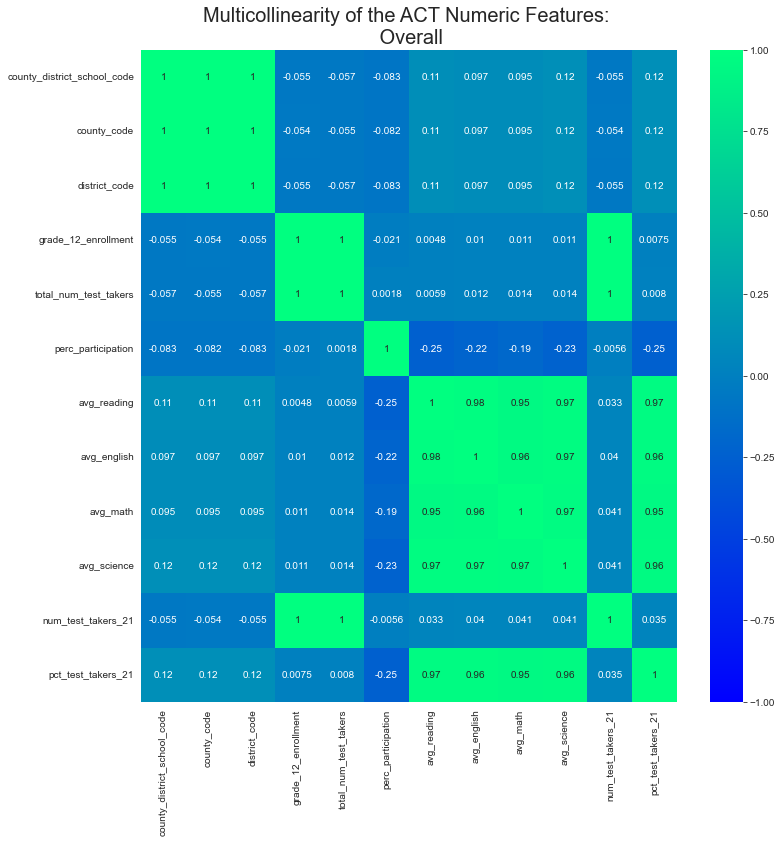

In [600]:
plt.figure(figsize=(12, 12))
sns.heatmap(act.corr(), cmap="winter", annot=True, vmin=-1, vmax=1)
plt.title('Multicollinearity of the ACT Numeric Features: \n Overall', fontsize=20);

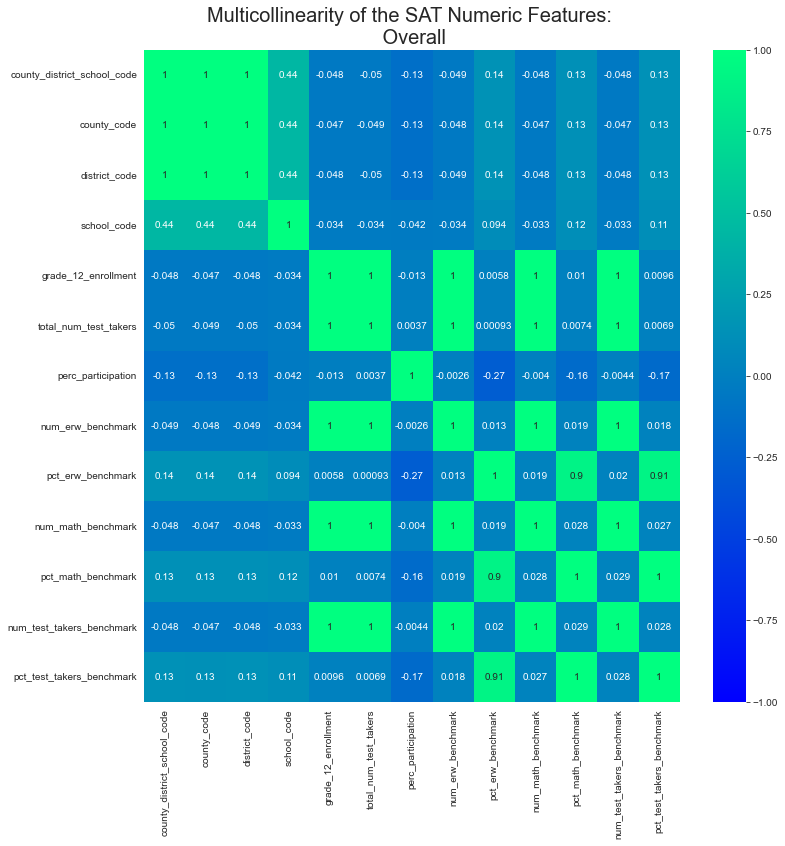

In [601]:
plt.figure(figsize=(12, 12))
sns.heatmap(sat.corr(), cmap="winter", annot=True, vmin=-1, vmax=1)
plt.title('Multicollinearity of the SAT Numeric Features: \n Overall', fontsize=20);

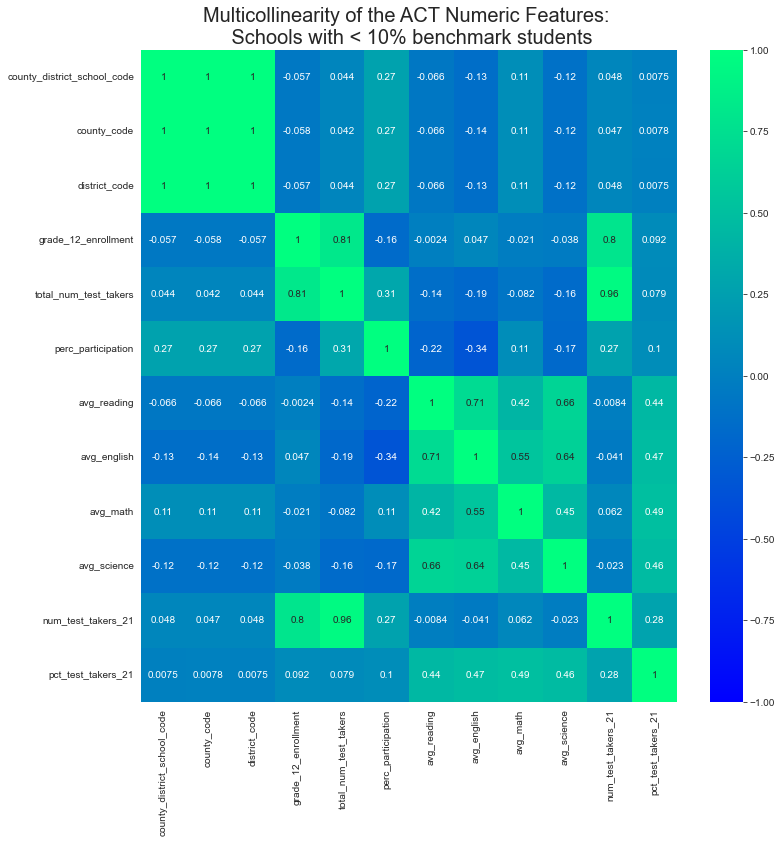

In [602]:
plt.figure(figsize=(12, 12))
sns.heatmap(act_21_below_10_perc.corr(), cmap="winter", annot=True, vmin=-1, vmax=1)
plt.title('Multicollinearity of the ACT Numeric Features: \n Schools with < 10% benchmark students', fontsize=20);

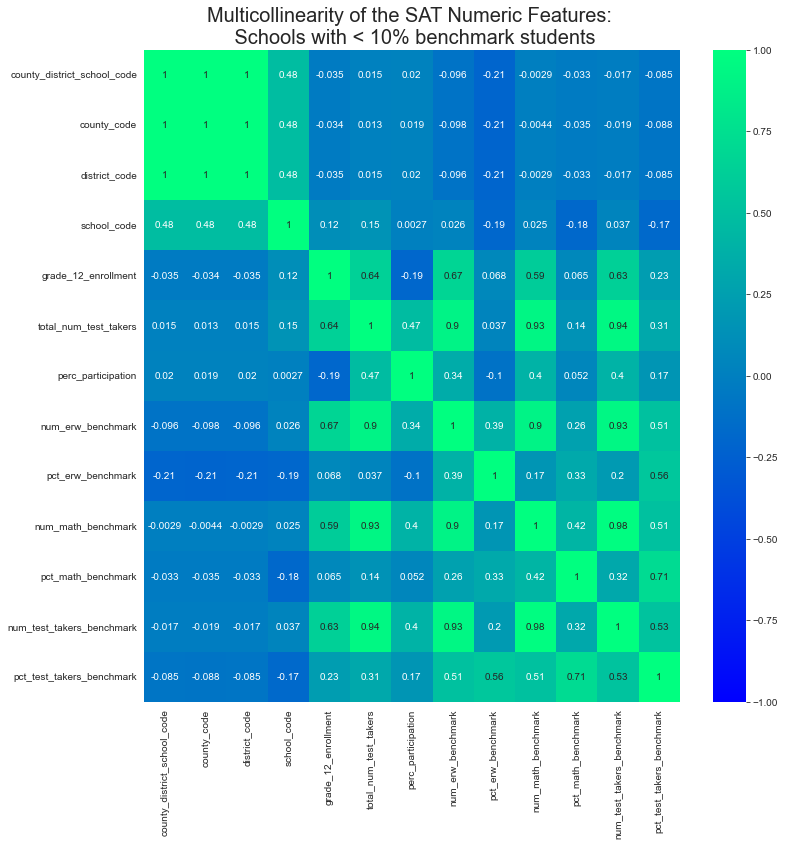

In [603]:
plt.figure(figsize=(12, 12))
sns.heatmap(sat_benchmark_below_10_perc.corr(), cmap="winter", annot=True, vmin=-1, vmax=1)
plt.title('Multicollinearity of the SAT Numeric Features: \n Schools with < 10% benchmark students', fontsize=20);

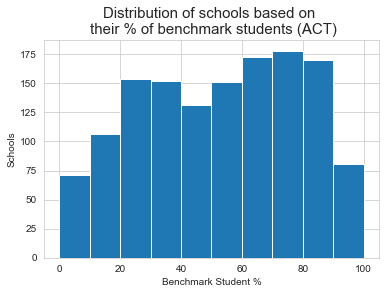

In [604]:
act['pct_test_takers_21'].hist()
plt.title('Distribution of schools based on \n their % of benchmark students (ACT)', fontsize=15)
plt.xlabel('Benchmark Student %')
plt.ylabel('Schools');

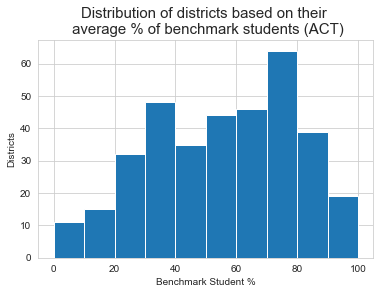

In [605]:
act_by_district = act.groupby('district_name')[['pct_test_takers_21']].mean()

act_by_district.hist()
plt.title('Distribution of districts based on their \n average % of benchmark students (ACT)', fontsize=15)
plt.xlabel('Benchmark Student %')
plt.ylabel('Districts');

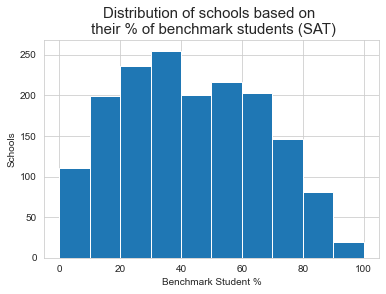

In [606]:
sat['pct_test_takers_benchmark'].hist()
plt.title('Distribution of schools based on \n their % of benchmark students (SAT)', fontsize=15)
plt.xlabel('Benchmark Student %')
plt.ylabel('Schools');

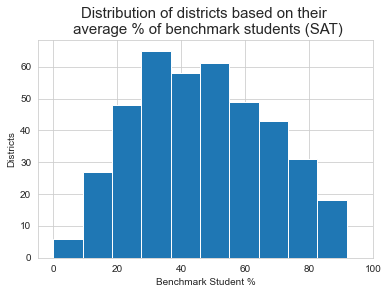

In [607]:
sat_by_district = sat.groupby('district_name')[['pct_test_takers_benchmark']].mean()

sat_by_district.hist()
plt.title('Distribution of districts based on their \n average % of benchmark students (SAT)', fontsize=15)
plt.xlabel('Benchmark Student %')
plt.xticks(range(0,101,20))
plt.ylabel('Districts');

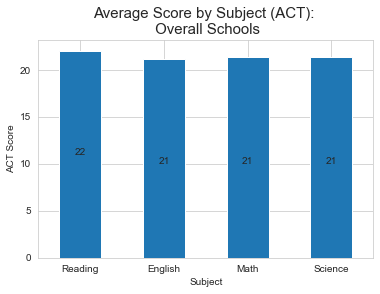

In [608]:
act_subject_averages = act[['avg_reading','avg_english','avg_math','avg_science']].mean()

# ADDING VALUE LABELS TO BARCHARTS SOURCE: 
# https://www.geeksforgeeks.org/adding-value-labels-on-a-matplotlib-bar-chart/

def addlabels_bar(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center')
  
if __name__ == '__main__':
    x = ['Reading','English','Math','Science']
    y = [22,21,21,21]

    act_subject_averages.plot(kind='bar')
    
    addlabels_bar(x,y)
    plt.title('Average Score by Subject (ACT): \n Overall Schools', fontsize=15)
    plt.xlabel('Subject')
    plt.xticks(ticks=[0,1,2,3], labels=['Reading', 'English', 'Math', 'Science'], rotation=0)
    plt.ylabel('ACT Score');

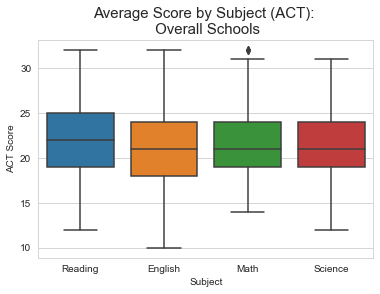

In [609]:
sns.boxplot(data=act[['avg_reading','avg_english','avg_math','avg_science']])

plt.title('Average Score by Subject (ACT): \n Overall Schools', fontsize=15)
plt.xlabel('Subject')
plt.xticks(ticks=[0,1,2,3], labels=['Reading', 'English', 'Math', 'Science'], rotation=0)
plt.ylabel('ACT Score');

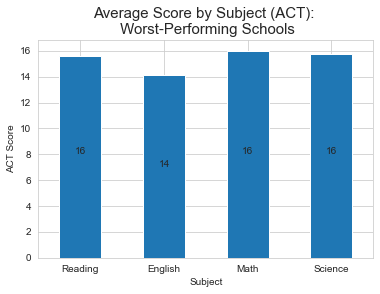

In [610]:
act_21_below_10_perc_subject_averages = act_21_below_10_perc[['avg_reading','avg_english','avg_math','avg_science']].mean()
  
if __name__ == '__main__':
    x = ['Reading','English','Math','Science']
    y = [16,14,16,16]

    act_21_below_10_perc_subject_averages.plot(kind='bar')

    addlabels_bar(x,y)
    plt.title('Average Score by Subject (ACT): \n Worst-Performing Schools', fontsize=15)
    plt.xlabel('Subject')
    plt.xticks(ticks=[0,1,2,3], labels=['Reading', 'English', 'Math', 'Science'], rotation=0)
    plt.ylabel('ACT Score');

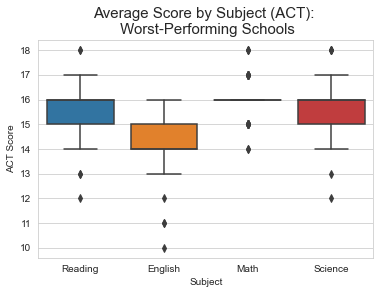

In [611]:
sns.boxplot(data=act_21_below_10_perc[['avg_reading','avg_english','avg_math','avg_science']])

plt.title('Average Score by Subject (ACT): \n Worst-Performing Schools', fontsize=15)
plt.xlabel('Subject')
plt.xticks(ticks=[0,1,2,3], labels=['Reading', 'English', 'Math', 'Science'], rotation=0)
plt.ylabel('ACT Score');

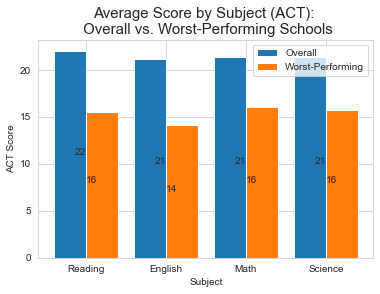

In [612]:
def addlabels_1_bar(x,y1):
    for i in range(len(x)):
        plt.text(i, y1[i]//2, y1[i], ha = 'right')
        
def addlabels_2_bar(x,y2):
    for i in range(len(x)):
        plt.text(i, y2[i]//2, y2[i], ha = 'left')
  
if __name__ == '__main__':
    x = ['Reading','English','Math','Science']
    y1 = [22,21,21,21]
    y2 = [16,14,16,16]

plt.bar(np.arange(4) -0.2, act_subject_averages, width=0.4, label = 'Overall')
plt.bar(np.arange(4) +0.2, act_21_below_10_perc_subject_averages, width=0.4, label = 'Worst-Performing')

addlabels_1_bar(x,y1)
addlabels_2_bar(x,y2)
plt.title('Average Score by Subject (ACT): \n Overall vs. Worst-Performing Schools', fontsize=15)
plt.xlabel('Subject')
plt.xticks(ticks=[0,1,2,3], labels=['Reading', 'English', 'Math', 'Science'], rotation=0)
plt.ylabel('ACT Score')
plt.legend();

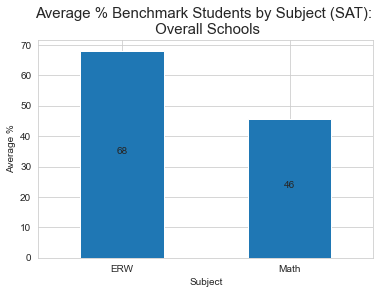

In [613]:
sat_subject_perc_averages = sat[['pct_erw_benchmark','pct_math_benchmark']].mean()
  
if __name__ == '__main__':
    x = ['ERW','MATH']
    y = [68,46]

    sat_subject_perc_averages.plot(kind='bar')
    
    addlabels_bar(x,y)
    plt.title('Average % Benchmark Students by Subject (SAT): \n Overall Schools', fontsize=15)
    plt.xlabel('Subject')
    plt.xticks(ticks=[0,1], labels=['ERW','Math'], rotation=0)
    plt.ylabel('Average %');

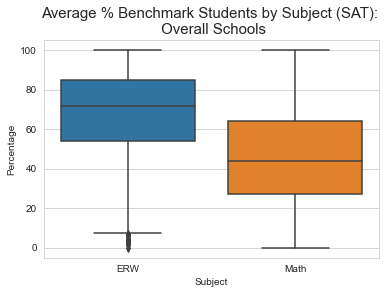

In [614]:
sns.boxplot(data=sat[['pct_erw_benchmark','pct_math_benchmark']])

plt.title('Average % Benchmark Students by Subject (SAT): \n Overall Schools', fontsize=15)
plt.xlabel('Subject')
plt.xticks(ticks=[0,1], labels=['ERW','Math'], rotation=0)
plt.ylabel('Percentage');

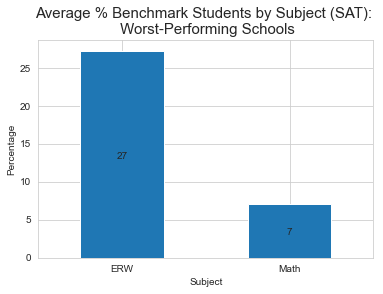

In [615]:
sat_benchmark_below_10_perc_subject_perc_averages = sat_benchmark_below_10_perc[['pct_erw_benchmark','pct_math_benchmark']].mean()
  
if __name__ == '__main__':
    x = ['ERW','MATH']
    y = [27,7]

    sat_benchmark_below_10_perc_subject_perc_averages.plot(kind='bar')
    
    addlabels(x,y)
    plt.title('Average % Benchmark Students by Subject (SAT): \n Worst-Performing Schools', fontsize=15)
    plt.xlabel('Subject')
    plt.xticks(ticks=[0,1], labels=['ERW','Math'], rotation=0)
    plt.ylabel('Percentage');

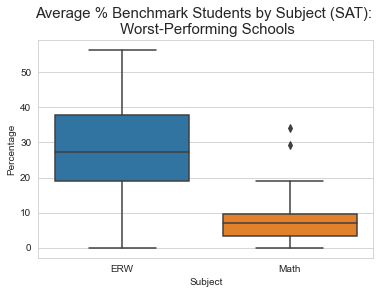

In [616]:
sns.boxplot(data=sat_benchmark_below_10_perc[['pct_erw_benchmark','pct_math_benchmark']])

plt.title('Average % Benchmark Students by Subject (SAT): \n Worst-Performing Schools', fontsize=15)
plt.xlabel('Subject')
plt.xticks(ticks=[0,1], labels=['ERW','Math'], rotation=0)
plt.ylabel('Percentage');

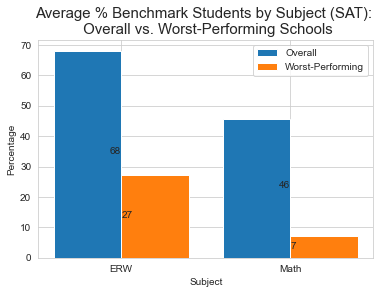

In [617]:
if __name__ == '__main__':
    x = ['ERW','MATH']
    y1 = [68,46]
    y2 = [27,7]

plt.bar(np.arange(2) -0.2, sat_subject_perc_averages, width=0.4, label = 'Overall')
plt.bar(np.arange(2) +0.2, sat_benchmark_below_10_perc_subject_perc_averages, width=0.4, label = 'Worst-Performing')

addlabels_1_bar(x,y1)
addlabels_2_bar(x,y2)
plt.title('Average % Benchmark Students by Subject (SAT): \n Overall vs. Worst-Performing Schools', fontsize=15)
plt.xlabel('Subject')
plt.xticks(ticks=[0,1], labels=['ERW','Math'], rotation=0)
plt.ylabel('Percentage')
plt.legend();

In [618]:
# Correlation b/w Benchmark Student % and Participation % - NONE

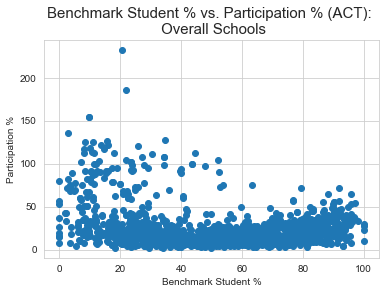

In [619]:
plt.scatter(act['pct_test_takers_21'],
            act['perc_participation']);

plt.title('Benchmark Student % vs. Participation % (ACT): \n Overall Schools', fontsize = 15)
plt.xlabel('Benchmark Student %')
plt.ylabel('Participation %');

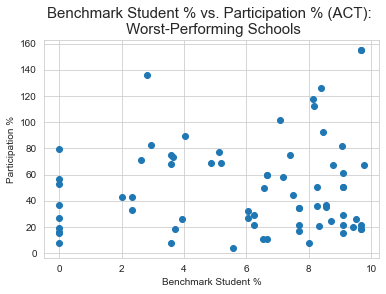

In [620]:
plt.scatter(act_21_below_10_perc['pct_test_takers_21'],
            act_21_below_10_perc['perc_participation']);

plt.title('Benchmark Student % vs. Participation % (ACT): \n Worst-Performing Schools', fontsize = 15)
plt.xlabel('Benchmark Student %')
plt.ylabel('Participation %');

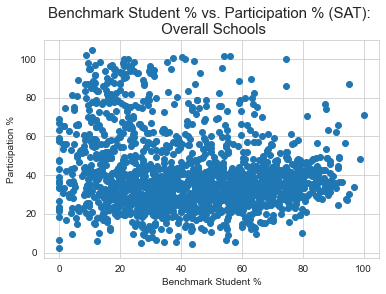

In [621]:
plt.scatter(sat['pct_test_takers_benchmark'],
            sat['perc_participation']);

plt.title('Benchmark Student % vs. Participation % (SAT): \n Overall Schools', fontsize = 15)
plt.xlabel('Benchmark Student %')
plt.ylabel('Participation %');

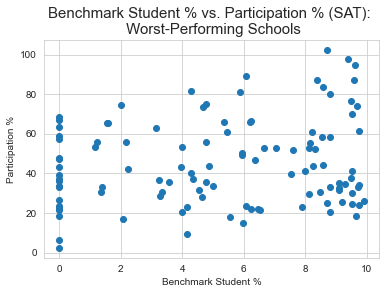

In [622]:
plt.scatter(sat_benchmark_below_10_perc['pct_test_takers_benchmark'],
            sat_benchmark_below_10_perc['perc_participation']);

plt.title('Benchmark Student % vs. Participation % (SAT): \n Worst-Performing Schools', fontsize = 15)
plt.xlabel('Benchmark Student %')
plt.ylabel('Participation %');